In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
import warnings
warnings.filterwarnings('ignore')

# load dataset from input directory
df = pd.read_csv("/Volumes/ExtraSpace/System Project/archive/cv-valid-train.csv") 
df[df['age'].notna()].head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,NaN
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN


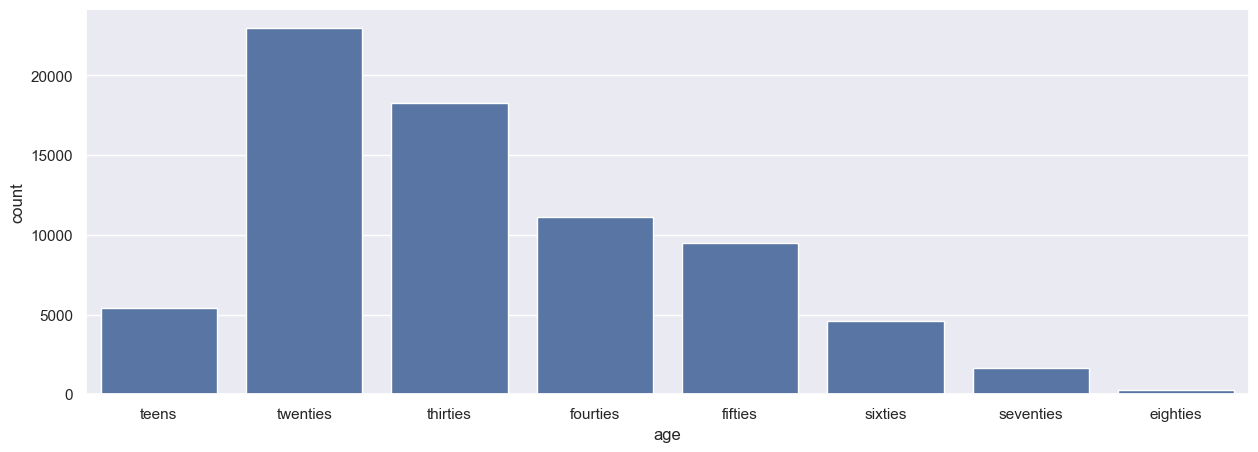

In [2]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age", 
        data=df[df['age'].notna()], 
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()


initial: (195776, 8) final: (73768, 8)


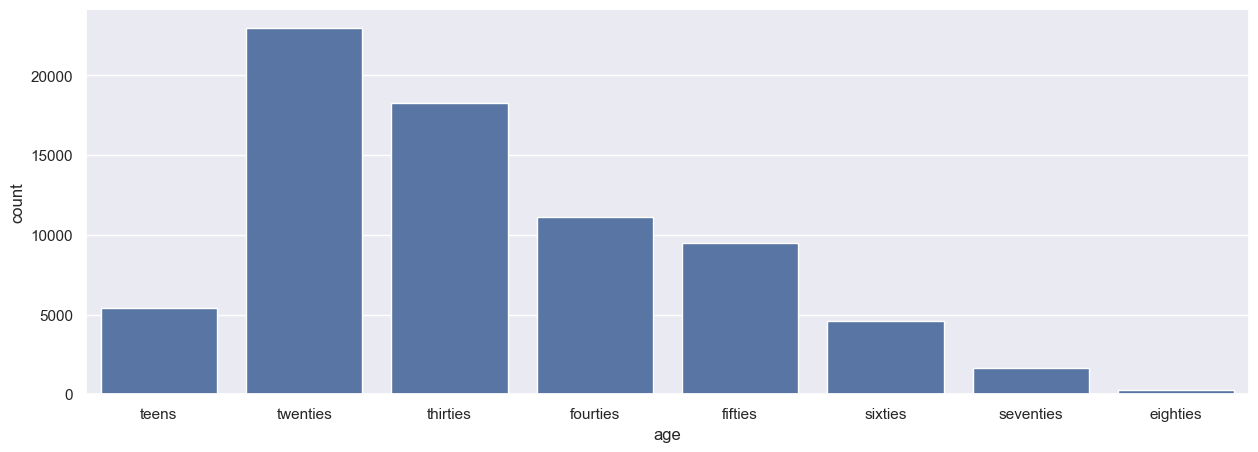

In [3]:
#del df['duration']
start=df.shape
#df.isna().sum()
end = df[df['age'].notna()].shape

print("initial: {} final: {}".format(start, end))

sns.countplot(x="age", 
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

Data Pre-processing

Data Cleaning¶

In this step we drop entries(samples) with NaN values. The columns that doesn't contribute(unnecessary) to the model are removed. The attributes are checked for its datatypes and changed to an approapriate type.

In [4]:
#we extract the columns that we think useful are
df = df[['filename','age']]
#To clean the data we remove the sample with NaN attribute values.
data = df[df['age'].notna()]
data.reset_index(inplace=True, drop=True)
data.head()

,filename,age
0,cv-valid-train/sample-000005.mp3,twenties
1,cv-valid-train/sample-000008.mp3,seventies
2,cv-valid-train/sample-000013.mp3,thirties
3,cv-valid-train/sample-000014.mp3,sixties
4,cv-valid-train/sample-000019.mp3,fifties


Feature Engineering

In [5]:
import librosa
ds_path = "/Volumes/ExtraSpace/System Project/archive/cv-valid-train/"

#this function is used to extract audio frequency features
def feature_extraction(filename, sampling_rate=48000):
    path = "{}{}".format(ds_path, filename)
    features = list()
    audio, _ = librosa.load(path, sr=sampling_rate)
    
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    features.append(spectral_centroid)
    features.append(spectral_bandwidth)
    features.append(spectral_rolloff)
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate)
    for el in mfcc:
        features.append(np.mean(el))
    
    return features
    
        
features = feature_extraction(data.iloc[0]['filename'])
print("features: ", features)

features:  [2147.6059074212358, 2430.4751793910987, 4428.830553016453, -625.28143, 111.306145, 6.3690853, 34.767105, 31.623457, -4.721563, -0.5119345, -4.945492, -12.712851, -2.043672, -3.7277253, -10.708403, -11.206562, -12.003514, -8.506436, -5.472295, -4.950395, -3.7100525, -6.314986, -6.328086]


In [6]:
#the function create dataframe to store the feature and label related to each other
def create_df_features(orig):
    new_rows = list()
    tot_rows = len(orig)-1
    stop_counter = 55001  # Stop after processing 55001 rows
    
    for idx, row in orig.iterrows():
        if idx >= stop_counter: break
        print("\r", end="")
        print("{}/{}".format(idx, tot_rows), end="", flush=True)
        features = feature_extraction(row['filename'])
        features.append(row['age'])
        new_rows.append(features)

    return pd.DataFrame(new_rows, columns=["spectral_centroid", "spectral_bandwidth", "spectral_rolloff",
                                    "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8",
                                   "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16",
                                   "mfcc17", "mfcc18", "mfcc19", "mfcc20", "label"])

df_features = create_df_features(data)
df_features.head()

55000/73767

,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,2147.605907,2430.475179,4428.830553,-625.281433,111.306145,6.369085,34.767105,31.623457,-4.721563,-0.511935,...,-10.708403,-11.206562,-12.003514,-8.506436,-5.472295,-4.950395,-3.710052,-6.314986,-6.328086,twenties
1,2815.325466,2451.922446,4884.633819,-469.936646,126.283386,-16.548651,3.546791,2.184188,13.748076,-1.324956,...,-10.987889,1.132519,6.090084,-1.732454,-1.226423,-6.432127,-7.269327,-4.796600,-3.129157,seventies
2,1844.637733,1491.011514,3164.948048,-418.205475,147.666870,-49.974003,-2.286365,37.185307,-8.906047,-14.228475,...,-13.844885,-9.928527,-7.873624,-5.476490,-2.298845,-6.556986,-5.206550,-0.403855,-3.877070,thirties
3,2123.711310,2202.012835,4111.215965,-464.910706,118.437233,19.749660,27.143229,26.438824,2.309232,-9.353925,...,-5.461425,-2.908411,-4.496074,-2.716447,-0.080573,-5.294940,-5.868720,0.600509,-3.375832,sixties
4,2360.672056,2957.220329,4767.080050,-343.833008,157.153885,7.661152,41.898964,-15.152473,28.925106,0.091126,...,0.102648,6.319803,-1.603870,3.837120,-2.643298,2.323318,-1.382684,3.791498,-3.534383,fifties


Feature Transformation

In [7]:
from sklearn.preprocessing import StandardScaler

def scale_features(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data.iloc[:, 0:-1], dtype = float))
    # with data.iloc[:, 0:-1] we don't consider the label column
        
    return scaled_data, scaler

x, scaler = scale_features(df_features)

In [8]:
print("Before scaling:", df_features.iloc[0].values[:-1])
print("\nAfter scaling:", x[0])


Before scaling: [2147.6059074212358 2430.4751793910987 4428.830553016453 -625.28143
 111.306145 6.3690853 34.767105 31.623457 -4.721563 -0.5119345 -4.945492
 -12.712851 -2.043672 -3.7277253 -10.708403 -11.206562 -12.003514
 -8.506436 -5.472295 -4.950395 -3.7100525 -6.314986 -6.328086]

After scaling: [-0.67957364 -0.13621235 -0.41051676 -1.99911912 -0.21342794  0.49042359
  0.76930875  1.67285514 -0.87088802  0.1674188  -0.27952027 -1.09011544
  0.46815417 -0.01344448 -1.18555913 -1.70574936 -1.33258812 -1.1891758
 -0.55979826 -0.36753487 -0.50760061 -1.03412028 -0.64333501]


In [9]:
df_features['label'].unique()


array(['twenties', 'seventies', 'thirties', 'sixties', 'fifties',
       'fourties', 'teens', 'eighties'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, -1]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y, encoder = get_labels(df_features)
classes = encoder.classes_
print("Before encoding:", df_features.iloc[0].values[-1])
print("\nAfter encoding:", y[0])
print("\nClasses:", classes)

Before encoding: twenties

After encoding: 7

Classes: ['eighties' 'fifties' 'fourties' 'seventies' 'sixties' 'teens' 'thirties'
 'twenties']


Feature Selection¶

We use the ANOVA (ANalysis Of VAriance) statistical technique (f_classif) to select the best 22 features.

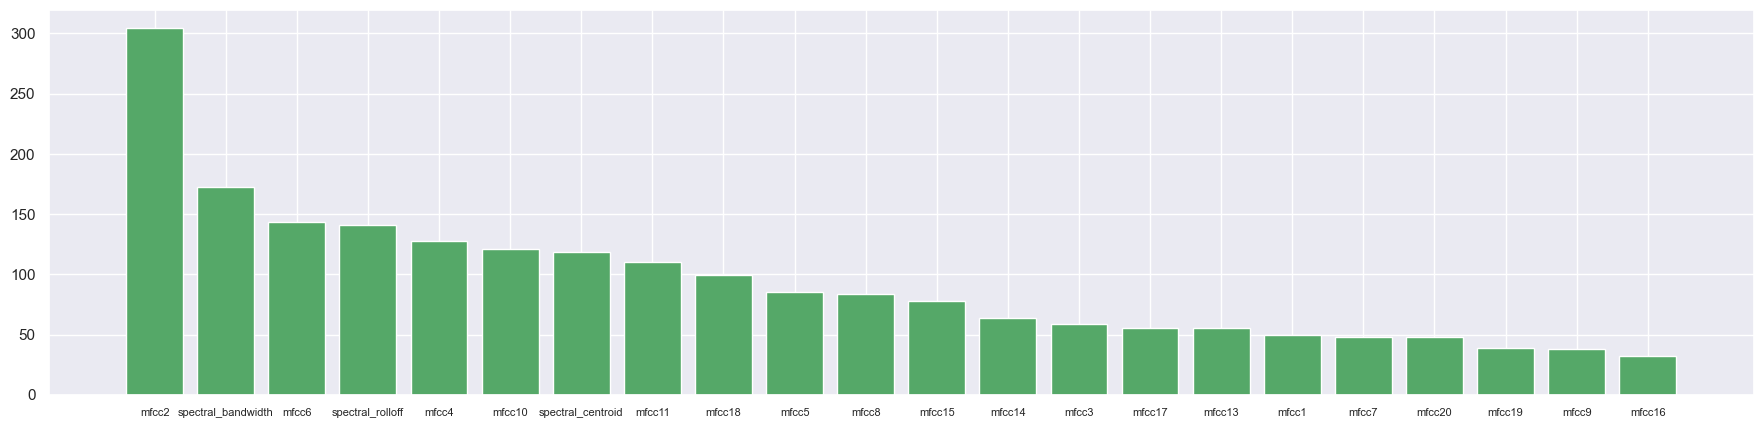

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

n_features = 22

f_selector = SelectKBest(f_classif, k=n_features).fit(x, y)
X_new = f_selector.transform(x)
scores = f_selector.scores_

indices = np.argsort(scores)[::-1]

features = []
for i in range(n_features):
    features.append(df_features.columns[indices[i]])
    
plt.figure(figsize=(22, 5))
plt.bar(features, scores[indices[range(n_features)]], color='g')
plt.xticks(fontsize=8)
plt.show()

Model Selection

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

classifiers_and_params = [
    (SVC(), {'C': [200, 150, 100], 'gamma': ['auto', 'scale']}),
    (RandomForestClassifier(), {'n_estimators': [100, 150, 200]})
]

for tup in classifiers_and_params:
    print("{}".format(tup[0].__class__.__name__))
    
    # the main CV process
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)
    fold_counter = 0

    results = list()
    for train_idx, test_idx in outer_cv.split(X_new):
        fold_counter += 1
        
        # split data in training and test sets
        X_train, X_test = X_new[train_idx], X_new[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # the CV process used for the Grid Search
        inner_cv = KFold(n_splits=2, shuffle=True, random_state=0)

        # define and run the Grid Search CV process
        gs = GridSearchCV(tup[0], tup[1], scoring='f1_macro', cv=inner_cv, refit=True)
        res = gs.fit(X_train, y_train)

        # get the best model, re-fit on the whole training set
        best_model = res.best_estimator_

        # evaluation on the test set
        pred = best_model.predict(X_test)
        score = f1_score(y_test, pred, average='macro')
        results.append(score)
        
        print("\tFold {}, Best Params {} with F1 Score {:.3f}, F1 Score on Test data {:.3f}"
              .format(fold_counter, res.best_params_, res.best_score_, score))

    print('\tAverage F1 Score on Test Set: {:.3f}\n'.format(np.mean(results)))

SVC
	Fold 1, Best Params {'C': 100, 'gamma': 'scale'} with F1 Score 0.762, F1 Score on Test data 0.820
	Fold 2, Best Params {'C': 100, 'gamma': 'scale'} with F1 Score 0.750, F1 Score on Test data 0.820
	Fold 3, Best Params {'C': 100, 'gamma': 'auto'} with F1 Score 0.759, F1 Score on Test data 0.811
	Average F1 Score on Test Set: 0.817

RandomForestClassifier
	Fold 1, Best Params {'n_estimators': 150} with F1 Score 0.627, F1 Score on Test data 0.693
	Fold 2, Best Params {'n_estimators': 150} with F1 Score 0.610, F1 Score on Test data 0.719
	Fold 3, Best Params {'n_estimators': 150} with F1 Score 0.637, F1 Score on Test data 0.700
	Average F1 Score on Test Set: 0.704



In [13]:
import itertools
import matplotlib.pyplot as plt

def my_plot_confusion_matrix(cm, classes, normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix (without normalization)"
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title(title)

    thresh = cm.max() / 2.
    fmt = "{:0.2f}" if normalize else "{:d}"
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, fmt.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

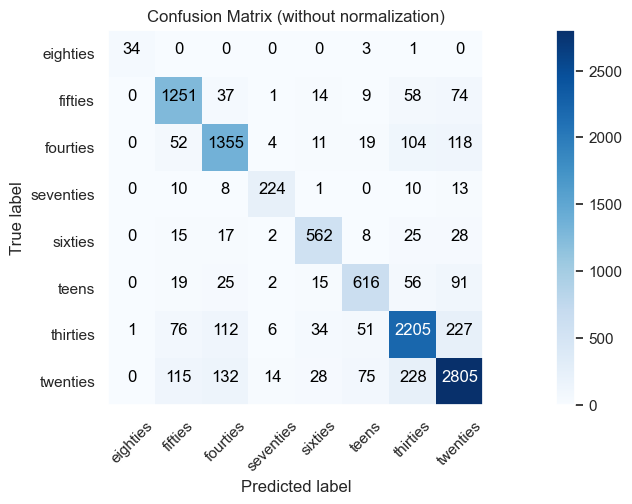

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

model = SVC(C=100, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure()
my_plot_confusion_matrix(cm, classes=classes)

plt.grid(False)
plt.show()


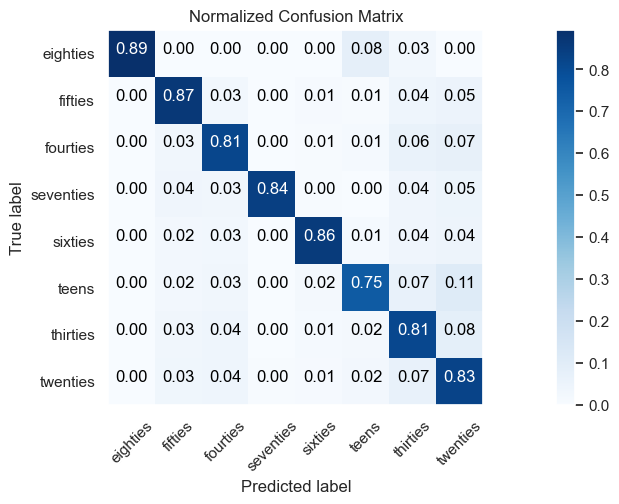

In [15]:
# Plot normalized confusion matrix
plt.figure()
my_plot_confusion_matrix(cm, classes=classes, normalize=True)

plt.grid(False)
plt.show()

In [16]:
import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [17]:
import joblib
# Save all necessary objects
joblib.dump(scaler, 'scaler.sav')
joblib.dump(f_selector, 'feature_selector.sav')
joblib.dump(encoder, 'label_encoder.sav')
print("All model files saved successfully!")

All model files saved successfully!
